<a href="https://colab.research.google.com/github/A-Daher/A-Daher/blob/main/Projet_tarification_option_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Etude de la convergence du modèle en temps discretBinomial Options Pricing Model (BOPM) vers le modèle en temps continu Black, Scholes and Merton (BSM).**

In [4]:
################## import certain packages #######################
import math as m
import math  
from math import log, sqrt, pi, exp
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
from datetime import datetime, date
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
init_printing()



################ Les différents entrer data ##################
    #S: stock price
    #K: strike price
    #T: date de maturite
    #r: taux sans risque
    #q: taux continue de dividende 
    #sigma: volatilite 
    
S = 80
K = 70.5
r = np.log(1+.0405)
sigma = .27
T = 0.5
q = 0.1
n = 15

In [15]:
################## Le modèle du pricing discret BOPM  ##################


####le portefeuille sous-jacent sur 15 périodes 

def bop(n,t,S,sigma):
    dt = t/n
    u = m.exp(sigma*m.sqrt(dt))
    d = 1/u
    priceMatrix = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            priceMatrix[i,j] = S*m.pow(d,i) * m.pow(u,j-i)
    return priceMatrix    

print("la valeur de u est  ", m.exp(sigma*m.sqrt(T/n)))

print("\nla valeur de d est  ", 1/(m.exp(sigma*m.sqrt(T/n))))
print("\n\n Affichage de l'arbre CRR, montrant l'évolution du prix du sous-jacent : \n \n",np.matrix(priceMatrix.astype(int)))



la valeur de u est   1.0505302431459416

la valeur de d est   0.9519002489689182


 Affichage de l'arbre CRR, montrant l'évolution du prix du sous-jacent : 
 
 [[ 80  84  88  92  97 102 107 112 118 124 130 137 144 151 159 167]
 [  0  76  80  84  88  92  97 102 107 112 118 124 130 137 144 151]
 [  0   0  72  76  80  84  88  92  97 102 107 112 118 124 130 137]
 [  0   0   0  69  72  76  80  84  88  92  97 102 107 112 118 124]
 [  0   0   0   0  65  69  72  76  80  84  88  92  97 102 107 112]
 [  0   0   0   0   0  62  65  69  72  76  80  84  88  92  97 102]
 [  0   0   0   0   0   0  59  62  65  69  72  76  79  84  88  92]
 [  0   0   0   0   0   0   0  56  59  62  65  69  72  76  79  84]
 [  0   0   0   0   0   0   0   0  53  56  59  62  65  69  72  76]
 [  0   0   0   0   0   0   0   0   0  51  53  56  59  62  65  69]
 [  0   0   0   0   0   0   0   0   0   0  48  51  53  56  59  62]
 [  0   0   0   0   0   0   0   0   0   0   0  46  48  51  53  56]
 [  0   0   0   0   0   0   0   0   

In [16]:
####le portefeuille de réplication.

def OptionsVal(n, S, K, r, sigma, T,q, priceMatrix):
	dt = T/n
	u = m.exp(sigma*m.sqrt(dt))
	d = 1/u
	p = (m.exp((r-q)*dt)-d)/(u-d)
	putMatrix = np.zeros((n+1, n+1))
	callMatrix = np.zeros((n+1, n+1))

	for j in range(n+1, 0, -1):
		for i in range(j):
			if(j == n+1):
				putMatrix[i,j-1] = max(K-priceMatrix[i,j-1], 0)
				callMatrix[i,j-1] = max(priceMatrix[i,j-1]-K, 0)     
			else:
				putMatrix[i,j-1] = m.exp(-r*dt) * (p*putMatrix[i,j] + (1-p)*putMatrix[i+1,j])             
				callMatrix[i,j-1] = m.exp(-r*dt) * (p*callMatrix[i,j] + (1-p)*callMatrix[i+1,j])                                          
    
	return [putMatrix,callMatrix]

priceMatrix = bop(n,T,S,sigma)
putM,callM  = OptionsVal(n,S,K,r,sigma,T,q,priceMatrix)

print("\n Prix de l'option Call à chaque niveau de l'arbre Option:\n \n ",np.matrix(callM.astype(int)))

print("\n Prix de l'option Put à chaque niveau de l'arbre Option:\n \n ",np.matrix(putM.astype(int)))


#### Resultat

print("\nLa valeur du portefeuille de réplication et donc le prix du call et est",callM[0][0])

print("\nLa valeur du portefeuille de réplication et donc le prix du put est",putM[0][0])


 Prix de l'option Call à chaque niveau de l'arbre Option:
 
  [[ 9 12 16 20 24 29 34 40 46 52 58 65 72 80 88 97]
 [ 0  7  9 12 16 20 24 29 35 40 46 52 59 66 73 81]
 [ 0  0  5  6  9 12 16 20 25 30 35 41 47 53 60 67]
 [ 0  0  0  3  4  6  9 12 16 21 25 30 36 41 47 54]
 [ 0  0  0  0  1  2  4  6  9 12 16 21 26 31 36 42]
 [ 0  0  0  0  0  1  1  2  4  6  9 12 17 21 26 31]
 [ 0  0  0  0  0  0  0  0  1  2  3  6  9 13 17 22]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  3  5  9 13]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

 Prix de l'option Put à chaque niveau de l'arbre Option:
 
  [[ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3

In [17]:
################## le modele de black_scholes ##################

def black_scholes(S, K, T, r, q, sigma, option = 'call'):
    
    d1 = (np.log(S / K) + ((r - q )+ 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + ((r - q) - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result
    
C = black_scholes(S, K, T, r, q, sigma, option = 'call')
P = black_scholes(S, K, T, r, q, sigma, option = 'put')

print("\nLe prix du call selon black scholes est",C)

print("\nLe prix du call selon black scholes est",P)


Le prix du call selon black scholes est 9.698393529461633

Le prix du call selon black scholes est 2.7143651814321643


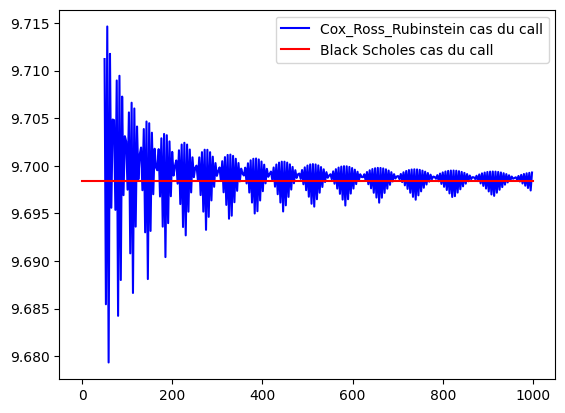

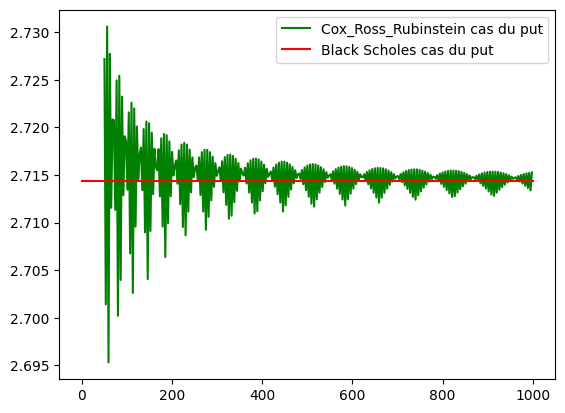

In [18]:
 ########graphique de convergence 

def Cox_Ross_Rubinstein_Tree(S,K,T,r,sigma,N,q, Option_type): 

    u=math.exp(sigma*math.sqrt(T/N));

    d=math.exp(-sigma*math.sqrt(T/N));

    pu=((math.exp((r-q)*T/N))-d)/(u-d);

    pd=1-pu;

    disc=math.exp(-r*T/N);

    St = [0] * (N+1)

    C = [0] * (N+1)

    St[0]=S*d**N;
    
    for j in range(1, N+1): 

        St[j] = St[j-1] * u/d;
        
    for j in range(1, N+1):

        if Option_type == 'P':

            C[j] = max(K-St[j],0);

        elif Option_type == 'C':

            C[j] = max(St[j]-K,0);
            
    for i in range(N, 0, -1):

        for j in range(0, i):

            C[j] = disc*(pu*C[j+1]+pd*C[j]);     

    return C[0]


#### le call de l'option sur des differents sur periode
BSPrice = black_scholes(S, K, T, r, q, sigma, option = 'call')
BS = [BSPrice,BSPrice]
BSRuns = [0,1000]

runs1 = list(range(50,1000,3))
CRR1 = []
for i in runs1:

    CRR1.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,q,'C'))

plt.plot(runs1, CRR1, 'b',label='Cox_Ross_Rubinstein cas du call')
plt.plot(BSRuns, BS, 'r',label='Black Scholes cas du call')
plt.legend(loc='upper right')
plt.show()


#### le put de l'option sur des differents sur periode
BSPrice = black_scholes(S, K, T, r, q, sigma, option = 'put')
BS = [BSPrice,BSPrice]
BSRuns = [0,1000]

runs1 = list(range(50,1000,3))
CRR1 = []
for i in runs1:

    CRR1.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,q,'P'))

plt.plot(runs1, CRR1, 'g',label='Cox_Ross_Rubinstein cas du put')
plt.plot(BSRuns, BS, 'r',label='Black Scholes cas du put')
plt.legend(loc='upper right')
plt.show()

In [19]:

def delta(S, K, T, r, q, sigma, option = 'call'):

    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        delta = -np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        
    return delta


########

def theta(S, K, T, r, q, sigma, option = 'call'):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        theta = -np.exp(-q * T) * (S * si.norm.cdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        theta = -np.exp(-q * T) * (S * si.norm.cdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        
    return theta

########

def rho(S, K, T, r, q, sigma, option = 'call'):
    
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        rho = K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    if option == 'put':
        rho = -K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        
    return rho

########

def gamma(S, K, T, r, q, sigma):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    gamma = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) / S * sigma * np.sqrt(T)
    
    return gamma

########

def vega(S, K, T, r, q, sigma):

    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    vega = 1 / np.sqrt(2 * np.pi) * S * np.exp(-q * T) * np.exp(-d1 ** 2 * 0.5) * np.sqrt(T)
    
    return vega

In [20]:
data = {'Call': [delta(S, K, T, r, q, sigma, option = 'call'),vega(S, K, T, r, q, sigma)
,gamma(S, K, T, r, q, sigma), theta(S, K, T, r, q, sigma, option = 'call'), rho(S, K, T, r, q, sigma, option = 'call')],
        'Put': [delta(S, K, T, r, q, sigma, option = 'put'),vega(S, K, T, r, q, sigma),
gamma(S, K, T, r, q, sigma), theta(S, K, T, r, q, sigma, option = 'put'), rho(S, K, T, r, q, sigma, option = 'put')]}
input_frame = DataFrame(data, columns=['Call', 'Put'], 
                   index=['delta','gamma','vega', 'theta', 'rho'])
input_frame

,Call,Put
delta,0.690249,-0.260980
gamma,17.934179,17.934179
vega,0.001647,0.001647
theta,-6.827801,-11.693703
rho,22.760778,-11.796385


In [21]:
################## les lettres grecque avec des differents variation ##################
def delta(S, K, T, r, q, sigma, option = 'call'):
    
    L = S + 1
    
    d1 = (np.log(L / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        delta = -np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        
    return delta


########

def theta(S, K, T, r, q, sigma, option = 'call'):
    
    t = T + 0.08
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
    
    if option == 'call':
        theta = -np.exp(-q * t) * (S * si.norm.cdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(t)) - r * K * np.exp(-r * t) * si.norm.cdf(d2, 0.0, 1.0) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        theta = -np.exp(-q * t) * (S * si.norm.cdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(t)) + r * K * np.exp(-r * t) * si.norm.cdf(-d2, 0.0, 1.0) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        
    return theta
########

def rho(S, K, T, r, q, sigma, option = 'call'):
    
    R = r + np.log(1+0.01)
    
    d2 = (np.log(S / K) + (R - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        rho = K * T * np.exp(-R * T) * si.norm.cdf(d2, 0.0, 1.0)
    if option == 'put':
        rho = -K * T * np.exp(-R * T) * si.norm.cdf(-d2, 0.0, 1.0)
        
    return rho

########

def gamma(S, K, T, r, q, sigma):
    
    L = S + 1

    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    gamma = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) / S * sigma * np.sqrt(T)
    
    return gamma

########

def vega(S, K, T, r, q, sigma):

    s = sigma +0.01
    
    d1 = (np.log(S / K) + (r - q + 0.5 * s ** 2) * T) / (s * np.sqrt(T))
    
    vega = 1 / np.sqrt(2 * np.pi) * S * np.exp(-q * T) * np.exp(-d1 ** 2 * 0.5) * np.sqrt(T)
    
    return vega

In [22]:
data = {'Call': [delta(S, K, T, r, q, sigma, option = 'call'),vega(S, K, T, r, q, sigma)
,gamma(S, K, T, r, q, sigma), theta(S, K, T, r, q, sigma, option = 'call'), rho(S, K, T, r, q, sigma, option = 'call')],
        'Put': [delta(S, K, T, r, q, sigma, option = 'put'),vega(S, K, T, r, q, sigma),
gamma(S, K, T, r, q, sigma), theta(S, K, T, r, q, sigma, option = 'put'), rho(S, K, T, r, q, sigma, option = 'put')]}
input_frame = DataFrame(data, columns=['Call', 'Put'], 
                   index=['delta','gamma','vega', 'theta', 'rho'])
input_frame

,Call,Put
delta,0.710466,-0.240763
gamma,18.088607,18.088607
vega,0.001647,0.001647
theta,-5.820134,-10.694737
rho,22.974863,-11.410799


In [23]:
################la volatilite implicite################
    
def newton_vol_call(S, K, T, C, q,r, sigma):
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    fx = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - C
    
    vega = (1 / np.sqrt(2 * np.pi)) * S * np.sqrt(T) * np.exp(-(si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
    tolerance = 0.0001
    x0 = sigma
    xnew  = x0
    xold = x0 - 1
        
    while abs(xnew - xold) > tolerance:
    
        xold = xnew
        xnew = (xnew - fx - C) / vega
        
        return abs(xnew)
def newton_vol_put(S, K, T, P, r, q, sigma):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    fx = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) -  P
    
    vega = (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
    tolerance = 0.000001
    x0 = sigma
    xnew  = x0
    xold = x0 - 1
        
    while abs(xnew - xold) > tolerance:
    
        xold = xnew
        xnew = (xnew - fx - P) / vega
        
        return abs(xnew)
print ("la volatilite implicite obtenue a partir du call",newton_vol_call(S, K, T, C, q,r, sigma))
print ("la volatilite implicite obtenue a partir du put",newton_vol_put(S, K, T, C, q,r, sigma))

la volatilite implicite obtenue a partir du call 0.29087028526621167
la volatilite implicite obtenue a partir du put 0.08426902278142438
